In [16]:
import os
import csv
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [17]:
def loadData(fileName, inputVariabNames, outputVariabName):
    data = []
    dataNames = []
    with open(fileName) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                dataNames = row
            else:
                data.append(row)
            line_count += 1

    calcInputs = []
    calcOutputs = []
    Hindex = dataNames.index("Happiness.Score")
    Windex = dataNames.index("Whisker.high")
    Eindex = dataNames.index("Economy..GDP.per.Capita.")
    for i in range(30):
        if data[i][Hindex] != '' and data[i][Eindex] != '' and data[i][Windex] != '':
            calcInputs.append([float(data[i][Hindex]), float(data[i][Windex])])
            calcOutputs.append(float(data[i][Eindex]))
    regressor = linear_model.LinearRegression()
    regressor.fit(calcInputs, calcOutputs)
    w0, w1, w2 = regressor.intercept_, regressor.coef_[0], regressor.coef_[1]

    inputs = []
    for i in range(len(data)):
        rowValues = []
        for feature in inputVariabNames:
            featureIndex = dataNames.index(feature)
            if data[i][featureIndex] == '':
                rez = w0 + float(data[i][Hindex]) * w1 + float(data[i][Windex]) * w2
                rowValues.append(rez)
            else:
                rowValues.append(float(data[i][featureIndex]))
        inputs.append(rowValues)

    selectedOutput = dataNames.index(outputVariabName)
    outputs = [float(data[i][selectedOutput]) for i in range(len(data))]

    return inputs, outputs


crtDir =  os.getcwd()
filePath = os.path.join(crtDir, 'data', 'v1_world-happiness-report-2017.csv')

inputs, outputs = loadData(filePath, ['Economy..GDP.per.Capita.', 'Freedom'], 'Happiness.Score')
print('in:  ', inputs[:5])
print('out: ', outputs[:5])

in:   [[1.616463184, 0.635422587], [1.482383013, 0.626006722], [1.48063302, 0.627162635], [1.564979553, 0.620070577], [1.443571925, 0.617950857]]
out:  [7.537000179, 7.521999836, 7.504000187, 7.493999958, 7.468999863]


In [18]:
# split data into training data (80%) and testing data (20%)
def splitData(inputs, outputs, train_size=0.8):
    np.random.seed(5)
    indexes = [i for i in range(len(inputs))]
    trainSample = np.random.choice(indexes, int(train_size * len(inputs)), replace=False)
    validationSample = [i for i in indexes if i not in trainSample]

    trainInputs = [inputs[i] for i in trainSample]
    trainOutputs = [outputs[i] for i in trainSample]

    validationInputs = [inputs[i] for i in validationSample]
    validationOutputs = [outputs[i] for i in validationSample]

    return trainInputs, trainOutputs, validationInputs, validationOutputs

In [19]:
def plotDataHistogram(x, variableName):
    n, bins, patches = plt.hist(x, 10)
    plt.title('Histogram of ' + variableName)
    plt.show()

In [20]:
def plot3D(inputs, outputs):
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter([x[0] for x in inputs], [x[1] for x in inputs], outputs, marker='o', c='r')
    ax.set_xlabel("GDP capital")
    ax.set_ylabel("Freedom")
    ax.set_zlabel("Happiness")
    ax.set_title("GDP capital and freedom vs. happiness")
    plt.show()


def plot3D_trainde_data(trainInputs, trainOutputs, validationInputs, validationOutputs):
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter([x[0] for x in trainInputs], [x[1] for x in trainInputs], trainOutputs, label='training data', marker='o',
               c='r')
    ax.scatter([x[0] for x in validationInputs], [x[1] for x in validationInputs], validationOutputs,
               label='validation data', marker='^')
    ax.set_xlabel("GDP capital")
    ax.set_ylabel("Freedom")
    ax.set_zlabel("Happiness")
    ax.set_title("Train and validatin data")
    ax.legend()
    plt.show()


def plot3D_learned_model(trainInputs, trainOutputs, w0, w1, w2):
    # Generate points for plotting the plane
    x1_range = np.linspace(min([x[0] for x in inputs]), max([x[0] for x in inputs]), 10)
    x2_range = np.linspace(min([x[1] for x in inputs]), max([x[1] for x in inputs]), 10)
    x1_range, x2_range = np.meshgrid(x1_range, x2_range)
    model_predictions = w0 + w1 * x1_range + w2 * x2_range

    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter([x[0] for x in inputs], [x[1] for x in inputs], outputs, color='red', label='Data Points')
    # Plot the learned model as a surface
    ax.plot_surface(x1_range, x2_range, model_predictions, alpha=0.5, color='blue', label='Learned Model')
    ax.set_xlabel('GDP capital')
    ax.set_ylabel('Freedom')
    ax.set_zlabel('Happiness')
    ax.set_title('Learned Model')
    ax.legend()
    plt.show()


def plot3D_prediction(validation_Freedom, validation_GDP, computedValidationOutputs, validationOutputs):
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(validation_Freedom, validation_GDP, computedValidationOutputs, c='y', marker='o',
               label='Computed Validation Data')  # Computed validation data
    ax.scatter(validation_Freedom, validation_GDP, validationOutputs, c='g', marker='^',
               label='Real Validation Data')  # Real validation data
    ax.set_xlabel('GDP per Capita')
    ax.set_ylabel('Freedom')
    ax.set_zlabel('Happiness Score')
    plt.title('Computed Validation and Real Validation Data')
    plt.legend()
    plt.show()

In [21]:
# learning step: init and train a linear regression model y = f(x) = w0 + w1 * x + w2 * x

# using sklearn
def trainLinearRegressionModel(trainInputs, trainOutputs, regressor):
    regressor.fit(trainInputs, trainOutputs)
    return regressor.intercept_, regressor.coef_[0], regressor.coef_[1]

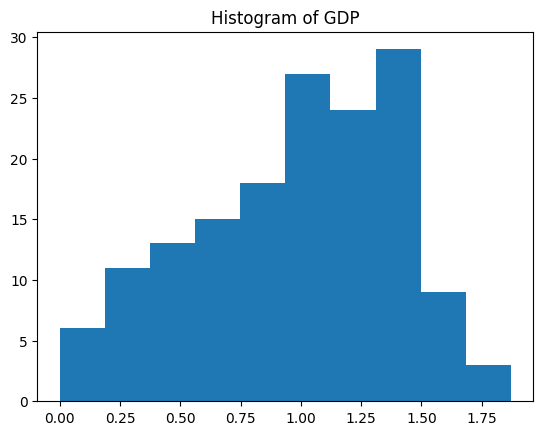

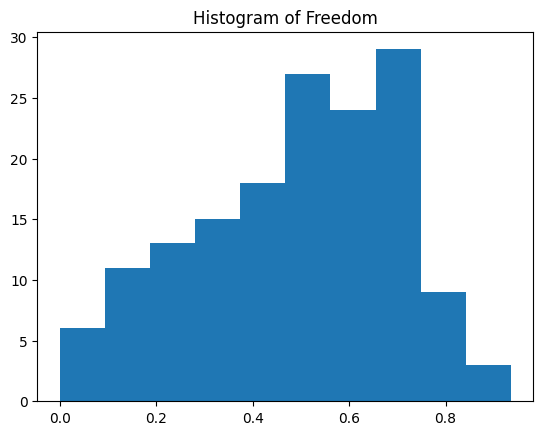

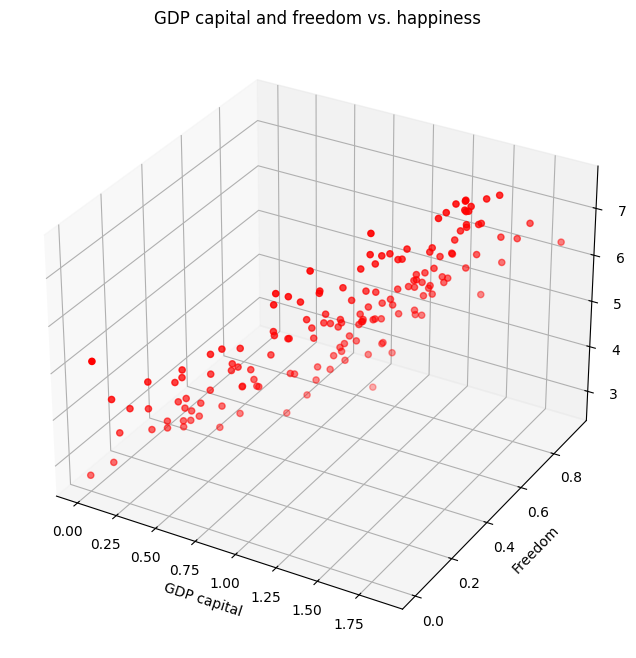

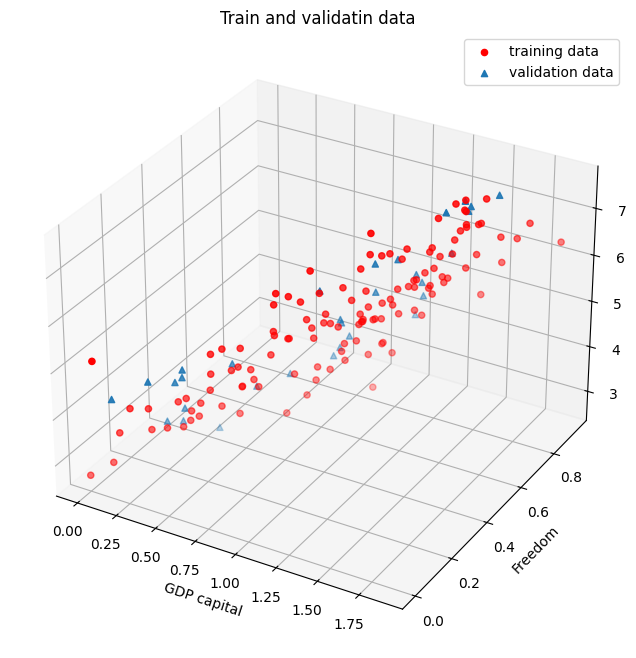

The learnt model: f(x) =  3.2007585989248835  +  -68616.18596733066  * x  +  137236.67264356057  * x


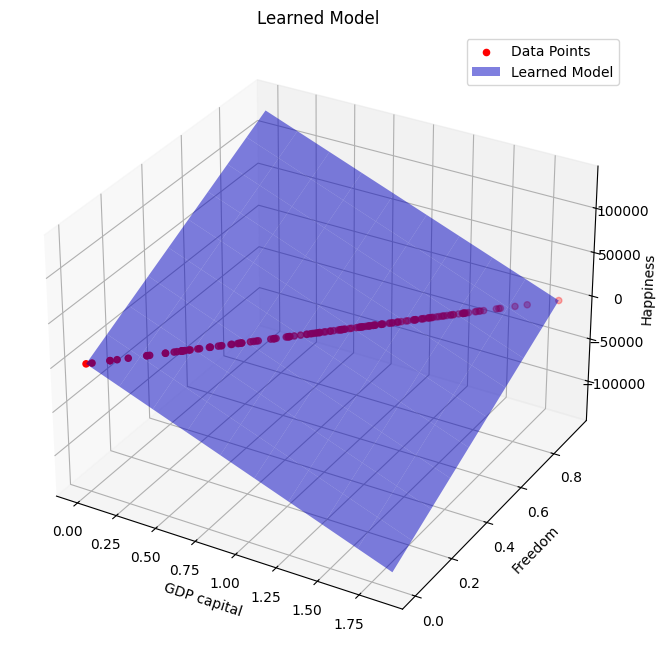

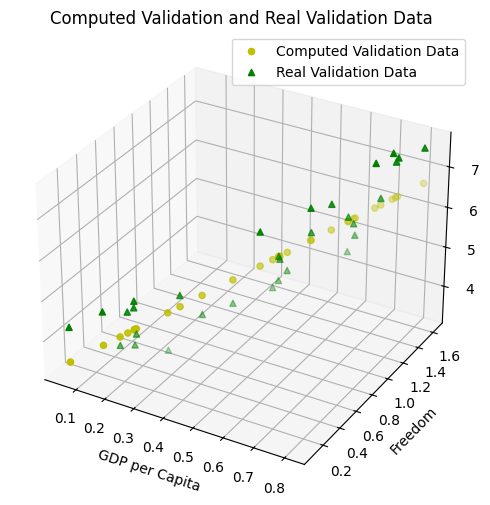

Prediction error (mean squared error):  0.4142102429519938


In [24]:
# put all steps togheter
# using sklearn 

crtDir =  os.getcwd()
filePath = os.path.join(crtDir, 'data', 'v2_world-happiness-report-2017.csv')
inputs, outputs = loadData(filePath, ['Economy..GDP.per.Capita.', 'Freedom'], 'Happiness.Score')

GDP = [x[0] for x in inputs]
Freedom = [x[1] for x in inputs]
plotDataHistogram(GDP, 'GDP')
plotDataHistogram(Freedom, 'Freedom')

# check the liniarity
plot3D(inputs, outputs)

# split data into training data (80%) and testing data (20%)
trainInputs, trainOutputs, validationInputs, validationOutputs = splitData(inputs, outputs)
plot3D_trainde_data(trainInputs, trainOutputs, validationInputs, validationOutputs)

# learning step: init and train a linear regression model y = f(x) = w0 + w1 * x + w2 * x
regressor = linear_model.LinearRegression()  # model initialisation
w0, w1, w2 = trainLinearRegressionModel(trainInputs, trainOutputs, regressor)
print('The learnt model: f(x) = ', w0, ' + ', w1, ' * x', ' + ', w2, ' * x')

# plot the model
plot3D_learned_model(trainInputs, trainOutputs, w0, w1, w2)

# makes predictions for test data (by tool)
computedValidationOutputs = regressor.predict(validationInputs)
if 'sklearn' in str(type(regressor)):
    computedValidationOutputs = computedValidationOutputs.tolist()
validation_Freedom = [x[1] for x in validationInputs]
validation_GDP = [x[0] for x in validationInputs]
plot3D_prediction(validation_Freedom, validation_GDP, computedValidationOutputs, validationOutputs)

# Compute the differences between the predictions and real outputs
error = mean_squared_error(validationOutputs, computedValidationOutputs)
print("Prediction error (mean squared error): ", error)

In [8]:
class MyLinearRegression:
    def __init__(self):
        self.intercept_ = 0.0
        self.coef_ = []

    def fit(self, X, Y):
        for el in X:
            el.insert(0, 1)
        Y = self.transpose([Y])
        rez1 = self.transpose(X)
        rez2 = self.multiply(rez1, X)
        rez3 = self.inverse(rez2)
        rez4 = self.multiply(rez3, rez1)
        rez5 = self.multiply(rez4, Y)
        self.intercept_ = rez5[0][0]
        for r in rez5[1:]:
            self.coef_.append(r[0])

    def predict(self, inputs):
        result = []
        for input in inputs:
            sum = self.intercept_
            for x, coef in zip(input, self.coef_):
                sum += x * coef
            result.append(sum)
        return result

    def transpose(self, matrix):
        transpose = []
        for j in range(len(matrix[0])):
            line = []
            for i in range(len(matrix)):
                line.append(matrix[i][j])
            transpose.append(line)
        return transpose

    def minor(self, matrix, i, j):
        result = []
        for x in range(len(matrix)):
            if x != i:
                line = []
                for y in range(len(matrix[0])):
                    if y != j:
                        line.append(matrix[x][y])
                result.append(line)
        return result

    def determinant(self, matrix):
        if len(matrix) == 1:
            return matrix[0][0]

        if len(matrix) == 2:
            return matrix[0][0] * matrix[1][1] - matrix[0][1] * matrix[1][0]

        det = 0.0
        for j in range(len(matrix)):
            det += matrix[0][j] * ((-1) ** j) * self.determinant(self.minor(matrix, 0, j))
        return det

    def inverse(self, matrix):
        if len(matrix) != len(matrix[0]):
            raise Exception("Different number of rows and columns!")

        detMatrix = self.determinant(matrix)
        if detMatrix == 0:
            raise Exception("Matrix is not invertible!")

        result = self.adj(matrix)
        for i in range(len(result)):
            for j in range(len(result)):
                result[i][j] /= detMatrix
        return result

    def adj(self, matrix):
        matrix = self.transpose(matrix)
        result = []
        for i in range(len(matrix)):
            line = []
            for j in range(len(matrix)):
                elem = ((-1) ** (i + j)) * self.determinant(self.minor(matrix, i, j))
                line.append(elem)
            result.append(line)
        return result

    def multiply(self, a, b):
        if len(a[0]) != len(b):
            raise Exception("Can not multiply these matrices!")

        result = []
        for i in range(len(a)):
            result.append([0 for _ in range(len(b[0]))])

        for i in range(len(a)):
            for j in range(len(b[0])):
                for k in range(len(b)):
                    result[i][j] += a[i][k] * b[k][j]
        return result

In [9]:
def error_mse(real, computed):
    error = 0.0
    for y1, y2 in zip(computed, real):
        error += (y1 - y2) ** 2
    error /= len(real)
    return error

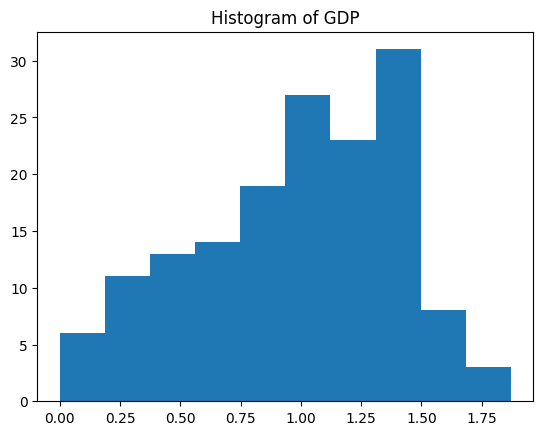

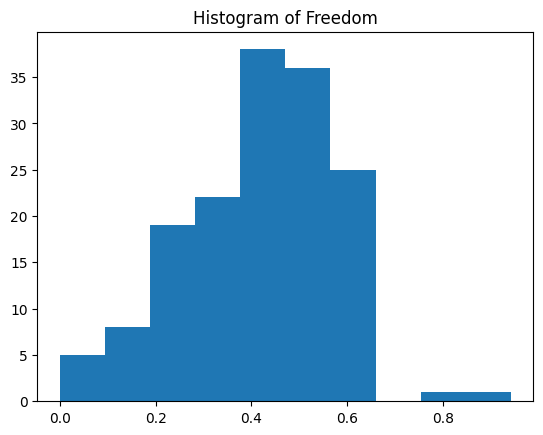

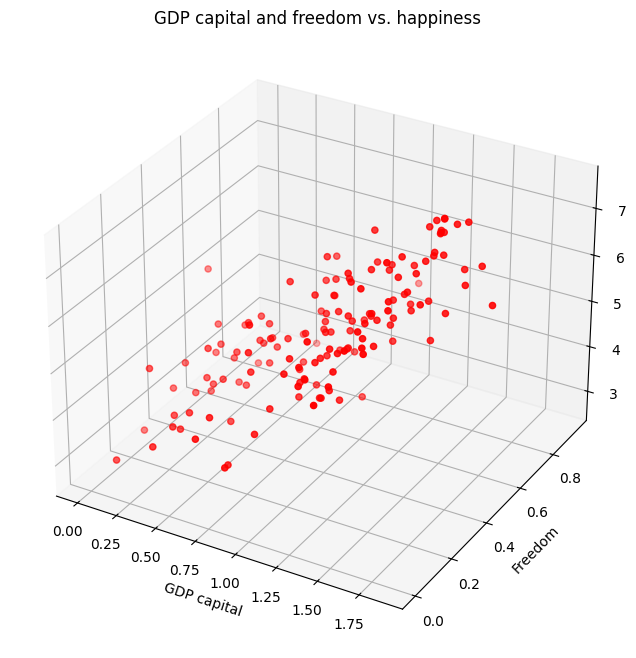

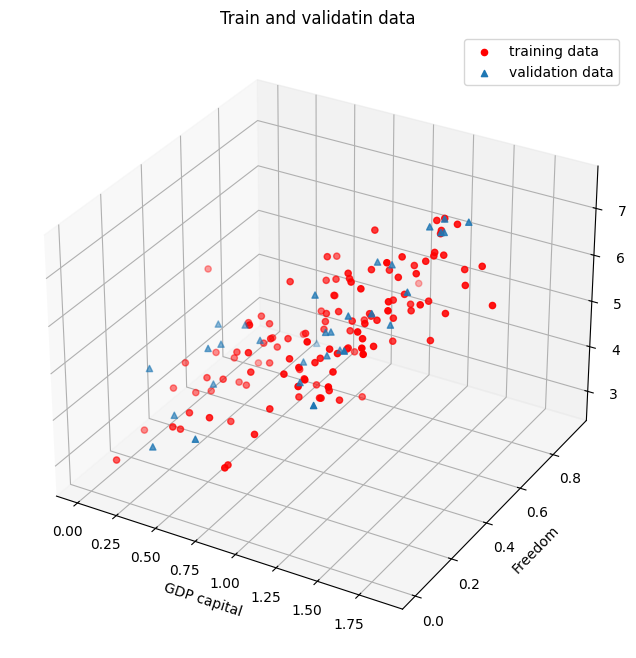

The learnt model: f(x) =  2.6198748800657055  +  1.919273054317981  * x1 +  1.9618413226048124  * x2


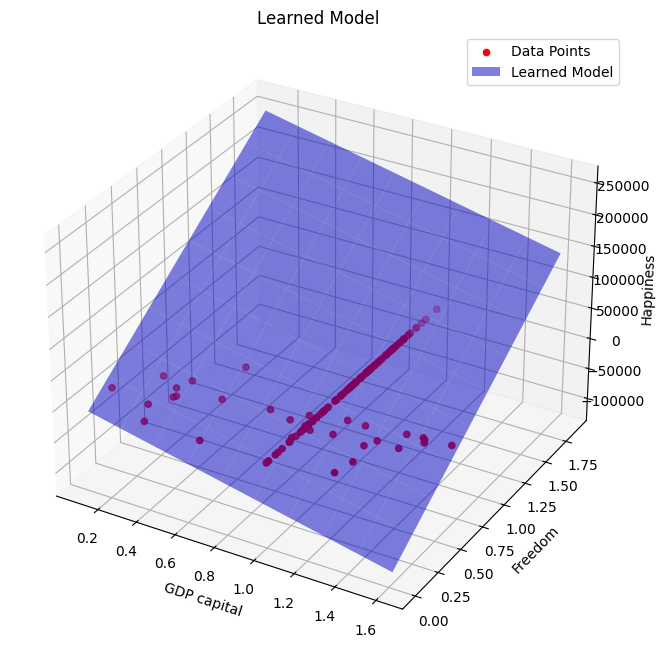

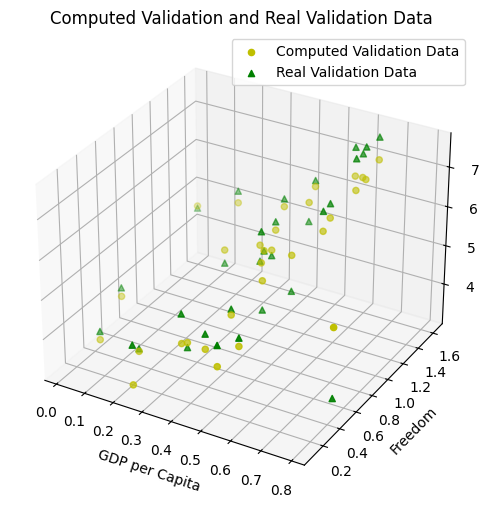

Prediction error (mean squared error):  0.357165113834404


In [27]:
# Instantiate MyLinearRegression class
model = MyLinearRegression()

crtDir =  os.getcwd()
filePath = os.path.join(crtDir, 'data', 'v3_world-happiness-report-2017.csv')
inputs, outputs = loadData(filePath, ['Economy..GDP.per.Capita.', 'Freedom'], 'Happiness.Score')

GDP = [x[0] for x in inputs]
Freedom = [x[1] for x in inputs]
plotDataHistogram(GDP, 'GDP')
plotDataHistogram(Freedom, 'Freedom')

# check the liniarity
plot3D(inputs, outputs)

# split data into training data (80%) and testing data (20%)
trainInputs, trainOutputs, validationInputs, validationOutputs = splitData(inputs, outputs)
plot3D_trainde_data(trainInputs, trainOutputs, validationInputs, validationOutputs)

# learning step: init and train a linear regression model y = f(x) = w0 + w1 * x + w2 * x
model.fit(trainInputs, trainOutputs)
print('The learnt model: f(x) = ', model.intercept_, ' + ', model.coef_[0], ' * x1 + ', model.coef_[1], ' * x2')

# plot the model
plot3D_learned_model(trainInputs, trainOutputs, w0, w1, w2)

# Make predictions
computedValidationOutputs = model.predict(validationInputs)
validation_Freedom = [x[1] for x in validationInputs]
validation_GDP = [x[0] for x in validationInputs]
plot3D_prediction(validation_Freedom, validation_GDP, computedValidationOutputs, validationOutputs)

# Compute the differences between the predictions and real outputs
error = error_mse(validationOutputs, computedValidationOutputs)
print("Prediction error (mean squared error): ", error)